# Class 1 - Phase identification - Single-Bus structure

## Agenda
- Problem Description
- Problem Implementation
- Alternative Problems
- Wrap-Up

## Problem Description

- While the connectivity model of low voltage (LV) grids is usually known, the phase connectivity information of single-phase connected customers is often erroneous or missing. This is due to many reasons including maintenance and other load balancing initiatives that usually do not update phase connectivity information and do not keep track of its changes in a systematic way.

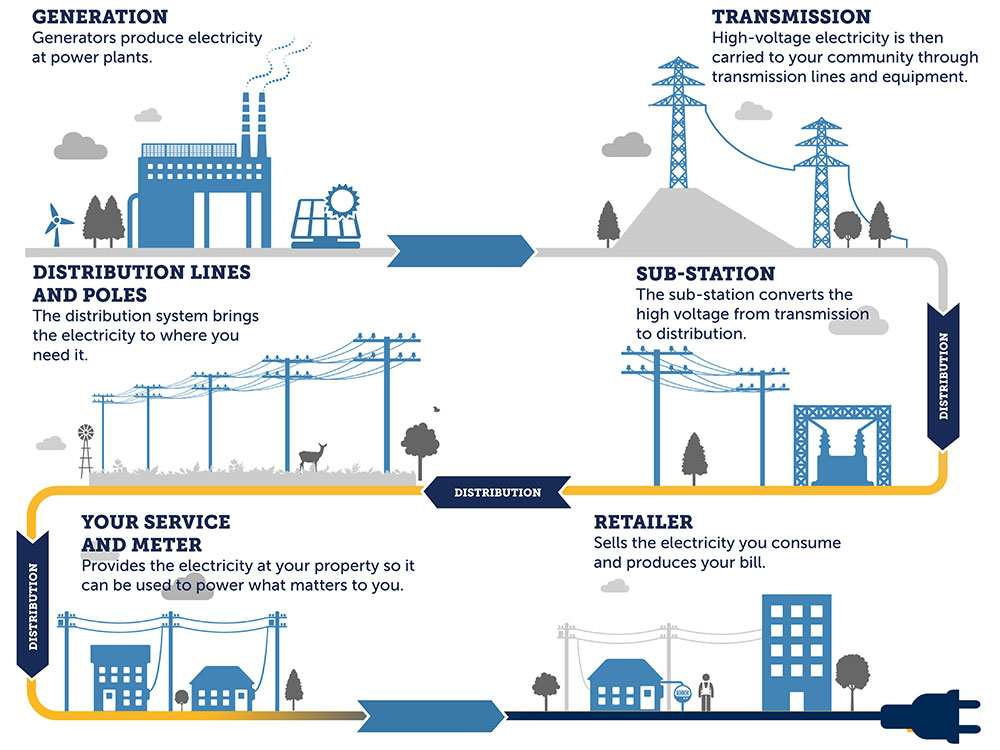
https://www.fortisalberta.com/about-us/our-company/blog/fortisalbertablog/2019/08/20/we-explain-the-complex-sophisticated-system-that-brings-electricity-to-you




- With the deployment of smart metering and the consequent availability
of high-resolution consumption data, phase connectivity
should be possible to estimate if data on per-phase aggregate energy
measurements would be available at substation sites with the
same resolutio.

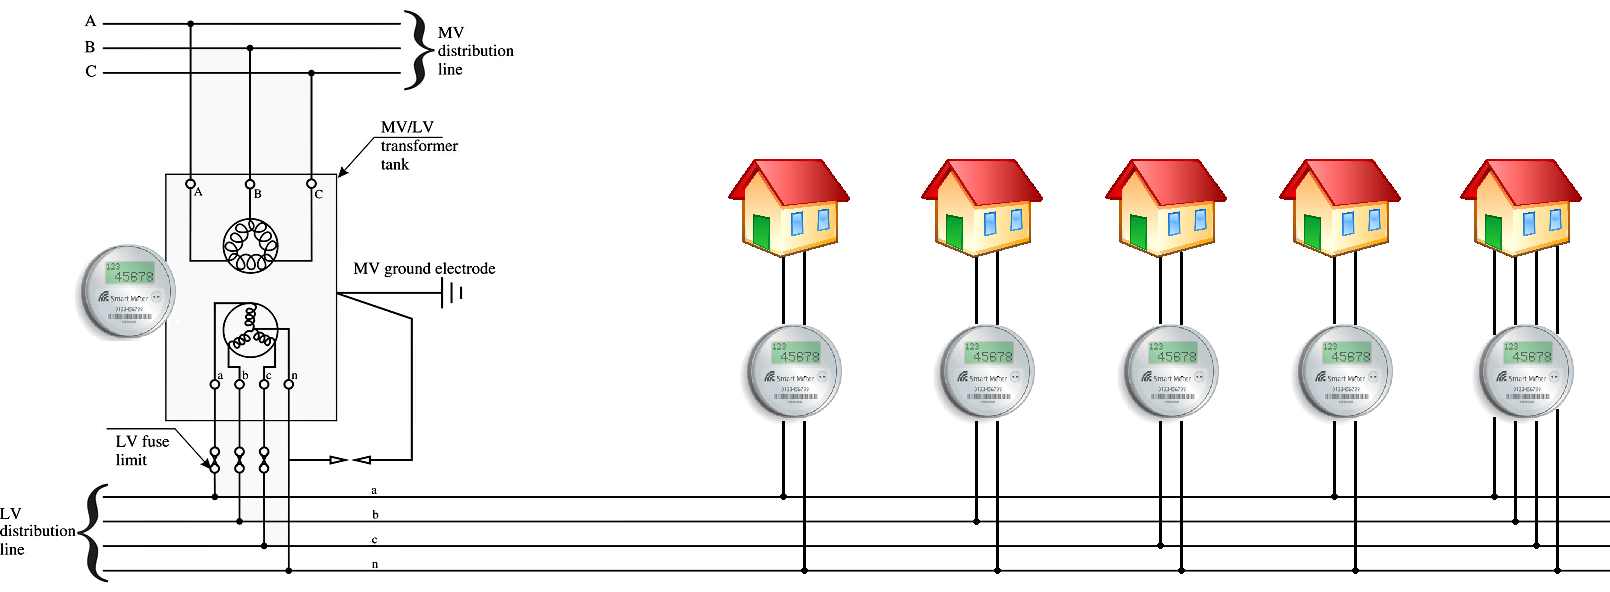

<b>Consider <i>N</i> customers whose connection phase assumes one out of three possible labels <i>a, b, </i> or <i> c</i> and estimate the correct customer-to-label assignment based on <i>M</i> readings whose per-phase values are a <i>function</i> of the corresponding phase-connected individual customer reading.</b>

## Problem Description

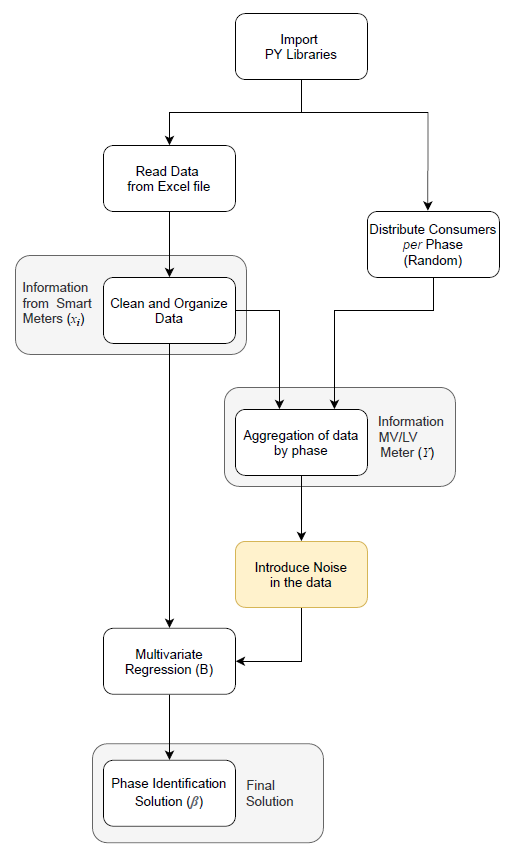

Import Python Libraries

In [25]:
import pandas as pd
import numpy as np
from numpy.random import randint   # To random values in the phases
from numpy.random import random   # To random values in the phases
import matplotlib.pyplot as plt


Parameters (It is possible to change to test different input data)

In [26]:
nc=4                        # Number of consumers (1 to nc)                  %%Data Notes: nc=4
ts=60                       #start period of analysis (Can be from 1 to 96)  %%Data Notes: ts=60
te=71                       #Last period of analysis (Can be from 1 to 96)   %%Data Notes: te=71
phase =[3,2,1,3]            #To obtain the same values of lecture notes
noise = 0.05                #To obtain the same values of lecture notes
#phase = randint(1, 4, nc)  #To obtain random values

print ("The distribution of consumers in each phase is: ", phase)

The distribution of consumers in each phase is:  [3, 2, 1, 3]


Import data (From Excel file)

In [27]:
raw_data = np.array(pd.read_excel ('Prob1_Conso_Data.xlsx', header=None))
print ("The raw data is: ", raw_data)

The raw data is:  [[datetime.time(0, 15) 0.13]
 [datetime.time(0, 30) 0.095]
 [datetime.time(0, 45) 0.585]
 ...
 [datetime.time(23, 30) 0.062]
 [datetime.time(23, 45) 0.078]
 [datetime.datetime(1900, 1, 1, 0, 0) 0.068]]


Clean and organize the data (delete zeros and organize by consumers)

In [28]:
checks=0
nr=1
data=np.zeros((1,96))
#h=np.arange(1/96, 1, 1/96).tolist()
h=raw_data[0:96,0]
for i in range(1,raw_data.shape[0]+1):
    if i==0:
        print(i)
    if raw_data[i-1,0]==h[checks]:
        checks=checks+1
    else:
        checks=0
    if checks==96:
        if np.sum(raw_data[i-96:i,1])!=0:
            data[nr-1,0:96]=raw_data[i-96:i,1]
            data.resize((nr+1,96))
            nr=nr+1
        checks=0
data.resize((nr-1,96))

data.shape[0]      #Can be deleted
print ("The number of consumers is ", data.shape[0], " and the number of periods is ", data.shape[1])

The number of consumers is  1390  and the number of periods is  96


Select data from consumers and period (Truncate the original matrix) 

In [29]:
data_Aux1=data[0:nc,:]
pw=data_Aux1[:,ts-1:te]

print ("The matrix 'pw' represents the power measured by the smart meter in each consumer (i) in each period (k)")
print ("In the lecture notes, this value is represented by X.")
print ("The value of X is:\n",np.transpose(4*pw))   # We should multiply by 4 to obtain the same values of the lectures. 
                                                    # In fact the original values are the average energy consumption for
                                                    # 15 minutes. To obtain the power, we should multiply by 4  

The matrix 'pw' represents the power measured by the smart meter in each consumer (i) in each period (k)
In the lecture notes, this value is represented by X.
The value of X is:
 [[0.332 0.064 0.084 0.12 ]
 [0.236 0.164 0.276 0.064]
 [0.224 0.708 1.572 0.072]
 [0.36  3.44  1.188 0.18 ]
 [1.332 2.176 0.484 1.464]
 [1.516 3.02  0.316 0.624]
 [0.92  0.916 0.404 2.772]
 [0.752 0.64  0.396 1.464]
 [1.828 0.684 0.576 0.576]
 [3.568 0.564 0.828 0.428]
 [0.78  0.356 0.728 0.348]
 [0.856 0.22  0.308 0.12 ]]


Consumers aggregation by phase and noise inclusion (normal distribution).

In [30]:
#Consumers aggregation by phase and noise inclusion (normal distribution)
y=np.zeros((te-ts+1,3))

X=np.transpose(4*pw)


#This matrix is used to aggregate the consumers by phase
Beta = [[0, 0, 1],
         [0, 1, 0], 
         [1, 0, 0], 
         [0, 0, 1]]

#the y matrix that is equal to X*Beta
y=np.dot(X,Beta)

#with noise in the y matrix
y2=np.dot(X,Beta)+noise*np.random.randn(te-ts+1,3)



Multivariate Regression 

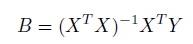

In [31]:
#Beta estimation without error

B = np.dot(X.T,X)
B = np.linalg.inv(B)
B = np.dot(B,X.T)
B = np.dot(B,y)


#Beta estimation with error
B2 = np.dot(X.T,X)
B2 = np.linalg.inv(B2)
B2 = np.dot(B2,X.T)
B2 = np.dot(B2,y2)

print("The estimated Beta is:\n", B)

#calculate the arg max of each line of the estimated B2
argmaxB = np.argmax(B, axis=1)

#The argmax of B2 is the phase of each consumer
print("The argmax of B (The phase of each consumer) by order is:\n", argmaxB+1)


print("The estimated Beta2 (with introduced error) is:\n", B2)

#calculate the arg max of each line of the estimated B2
argmaxB2 = np.argmax(B2, axis=1)

#The argmax of B2 is the phase of each consumer
print("The argmax of B2 (The phase of each consumer) by order is:\n", argmaxB2+1)

#The condition number of the matrix X
cond = np.linalg.cond(X)

#Just to check the sensivity of the problem (well conditioned or ill conditioned)
print("The condition number of the matrix X is: ", cond)


The estimated Beta is:
 [[-2.26069577e-16 -2.17553484e-16  1.00000000e+00]
 [-1.60652859e-16  1.00000000e+00  1.59732706e-16]
 [ 1.00000000e+00  4.87876946e-16 -3.07817483e-16]
 [ 4.93239289e-18  2.79510534e-16  1.00000000e+00]]
The argmax of B (The phase of each consumer) by order is:
 [3 2 1 3]
The estimated Beta2 (with introduced error) is:
 [[-0.00299752  0.01343702  1.0186349 ]
 [ 0.00555629  1.0025285   0.01512878]
 [ 1.00884364 -0.07134067 -0.10609727]
 [-0.02583409  0.02747109  1.00884767]]
The argmax of B2 (The phase of each consumer) by order is:
 [3 2 1 3]
The condition number of the matrix X is:  4.415273166307385


Plot

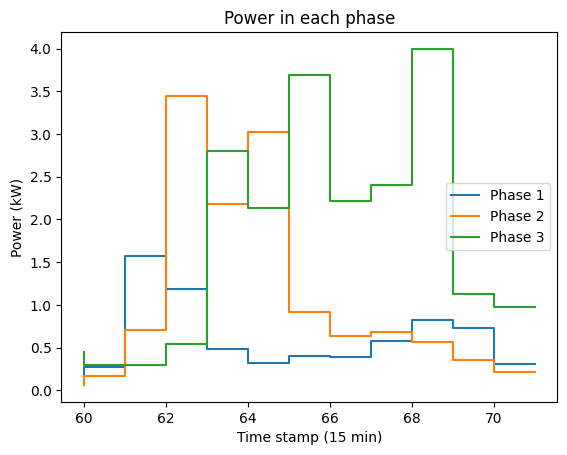

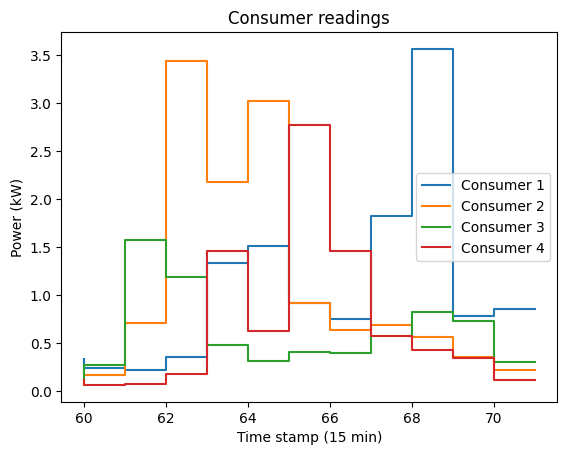

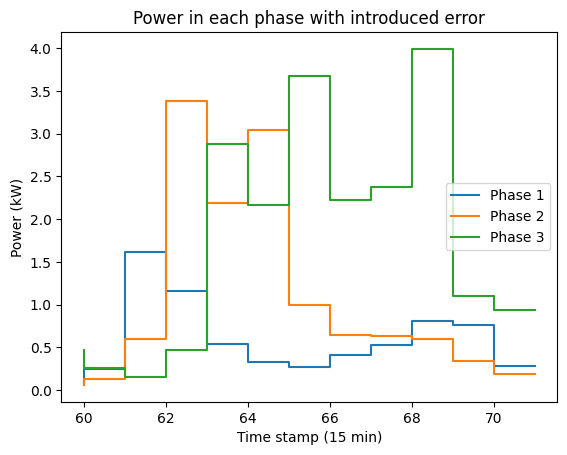

In [32]:
#Power in each phase (in kw)
plt.step(np.arange(ts,te+1,1),y[:,0],label='Phase 1')
plt.step(np.arange(ts,te+1,1),y[:,1],label='Phase 2')
plt.step(np.arange(ts,te+1,1),y[:,2],label='Phase 3')
plt.ylabel('Power (kW)')
plt.xlabel('Time stamp (15 min)')
plt.legend()
plt.title('Power in each phase')
plt.show()

#plot for X
plt.step(np.arange(ts,te+1,1),X[:,0],label='Consumer 1')
plt.step(np.arange(ts,te+1,1),X[:,1],label='Consumer 2')
plt.step(np.arange(ts,te+1,1),X[:,2],label='Consumer 3')
plt.step(np.arange(ts,te+1,1),X[:,3],label='Consumer 4')
plt.ylabel('Power (kW)')
plt.xlabel('Time stamp (15 min)')
plt.title('Consumer readings')
plt.legend()
plt.show()

#plot for y2
plt.step(np.arange(ts,te+1,1),y2[:,0],label='Phase 1')
plt.step(np.arange(ts,te+1,1),y2[:,1],label='Phase 2')
plt.step(np.arange(ts,te+1,1),y2[:,2],label='Phase 3')
plt.ylabel('Power (kW)')
plt.xlabel('Time stamp (15 min)')
plt.title('Power in each phase with introduced error')
plt.legend()
plt.show()



# Extra Challenges
- What happens if we have two consumers with the same consumption? 

X_equal with the last column equal to the first column:
 [[0.332 0.064 0.084 0.332]
 [0.236 0.164 0.276 0.236]
 [0.224 0.708 1.572 0.224]
 [0.36  3.44  1.188 0.36 ]
 [1.332 2.176 0.484 1.332]
 [1.516 3.02  0.316 1.516]
 [0.92  0.916 0.404 0.92 ]
 [0.752 0.64  0.396 0.752]
 [1.828 0.684 0.576 1.828]
 [3.568 0.564 0.828 3.568]
 [0.78  0.356 0.728 0.78 ]
 [0.856 0.22  0.308 0.856]]
The estimated Beta for the X_equal matrix is:
 [[-7.92664243e-03  7.25685986e-02  8.61883353e-01]
 [-5.37255431e-16  1.00000000e+00  5.55676392e-17]
 [ 1.00000000e+00 -2.58017792e-16 -1.02680421e-16]
 [ 1.45125799e-02 -6.50393017e-02  1.22172602e+00]]
The argmax of B (The phase of each consumer) by order is:
 [3 2 1 3]


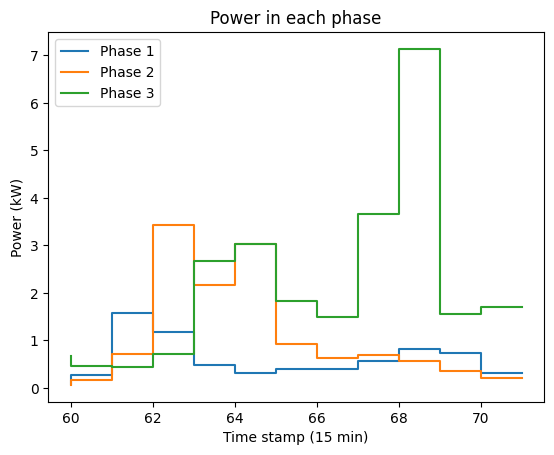

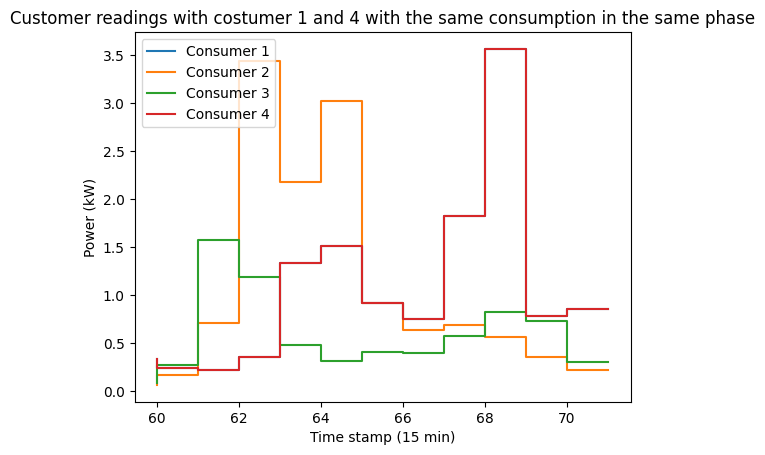

In [33]:

X_equal=np.transpose(4*pw)


#Replicate the first column of X_equal in the last column to have two consumers with the same consumption

X_equal[:,-1]=X_equal[:,0] 


print("X_equal with the last column equal to the first column:\n", X_equal)


#Calculating the y matrix with the consumers with the same consumption 

y_equal=np.zeros((te-ts+1,3))

Beta_equal = [[0, 0, 1],
         [0, 1, 0], 
         [1, 0, 0], 
         [0, 0, 1]]

#the y matrix that is equal to X*Beta
y_equal=np.dot(X_equal,Beta_equal)

'''
B = np.dot(X_equal.T,X_equal)
print("The matrix X_equal.T*X_equal is:\n", B)

#Calculate the determinant of the matrix X_equal.T*X_equal
det = np.linalg.det(B)
print("The determinant of the matrix X_equal.T*X_equal is: ", det)

B = np.linalg.inv(B)        
B = np.dot(B,X_equal.T)
B = np.dot(B,y_equal)

print("The estimated Beta for the X_equal matrix is:\n", B)
'''

#Compute the SVD to solve the problem of the matrix X_equal being singular
U, S, Vt = np.linalg.svd(X_equal, full_matrices=False)

# Pseudo-inverse calculation using SVD
S_inv = np.diag(1 / S)
X_inv = np.dot(Vt.T, np.dot(S_inv, U.T))

# Calculate coefficients
B = np.dot(X_inv, y_equal)

print("The estimated Beta for the X_equal matrix is:\n", B)

#calculate the arg max of each line of the estimated B
argmaxB = np.argmax(B, axis=1)

#The argmax of B is the phase of each consumer
print("The argmax of B (The phase of each consumer) by order is:\n", argmaxB+1)

#Power in each phase (in kw)
plt.step(np.arange(ts,te+1,1),y_equal[:,0],label='Phase 1')
plt.step(np.arange(ts,te+1,1),y_equal[:,1],label='Phase 2')
plt.step(np.arange(ts,te+1,1),y_equal[:,2],label='Phase 3')
plt.ylabel('Power (kW)')
plt.xlabel('Time stamp (15 min)')
plt.legend()
plt.title('Power in each phase')
plt.show()

#plot for X
plt.step(np.arange(ts,te+1,1),X_equal[:,0],label='Consumer 1')
plt.step(np.arange(ts,te+1,1),X_equal[:,1],label='Consumer 2')
plt.step(np.arange(ts,te+1,1),X_equal[:,2],label='Consumer 3')
plt.step(np.arange(ts,te+1,1),X_equal[:,3],label='Consumer 4')
plt.ylabel('Power (kW)')
plt.xlabel('Time stamp (15 min)')
plt.title('Customer readings with costumer 1 and 4 with the same consumption in the same phase')
plt.legend()
plt.show()



#If we have two consumers with same consumption the X matrix loses rank beacuse it will have two linearly dependent columns and the determinant is basically zero
#This means that the matrix X will not be invertible 
#From this we can conclude that if there are linear dependencies among the columns of X, there can be multiple sets of coefficients 
#x that produce the same approximation to b.
#in this particular case we can assume that there are multiple sets of phase assignments that could explain the observed measurements

#Using the SVD we can solve the problem of the matrix X being singular
#The SVD decomposes the matrix X into three matrices U, S, and Vt.
#The matrix S is a diagonal matrix that contains the singular values of X
#The matrix U contains the left singular vectors of X
#The matrix Vt contains the right singular vectors of X
#The pseudo-inverse of X is calculated using the SVD
#Now we can calculate the coefficients using the pseudo-inverse of X and the y matrix
#The estimated Beta distributes the power of the consumers who have the same consumptions between the phases
#Then we need to interpt the estimated results and understand that the solution is not unique



What about if the difference is very small ? Can we quantify the sensitivity ?

Condition Number! 

In [34]:
X_almost_equal=np.transpose(4*pw)

counter=0
#generate perturbation values between 10^-1 and 10^-10 to verify the sensitivity of the problem

for perturbation in np.logspace(-1, -10, 100):  
    X_almost_equal[:, -1] = X_almost_equal[:,0] + np.random.normal(0, perturbation, size=(12,))

    #Calculating the y matrix

    y_almost_equal=np.zeros((te-ts+1,3))

    Beta_almost_equal = [[0, 0, 1],
            [0, 1, 0], 
            [1, 0, 0], 
            [0, 0, 1]]

    #the y matrix that is almost_equal to X*Beta
    y_almost_equal=np.dot(X_almost_equal,Beta_almost_equal)


    B = np.dot(X_almost_equal.T,X_almost_equal)

    counter = counter + 1
    #determinant of B
    det = np.linalg.det(B)
    print("counter: ", counter)
    print("The determinant of the matrix X_almost_equal.T*X_almost_equal is: ", det)
    print("The perturbation is: ", perturbation)
    #contion number of X_almost_equal
    cond = np.linalg.cond(X_almost_equal)
    print("The condition number of the matrix X_almost_equal is: ", cond)

    try:
        np.linalg.inv(B)  # Try to invert the matrix
        print(f"For perturbation {perturbation}, the matrix is invertible.")
    except np.linalg.LinAlgError:
        print(f"For perturbation {perturbation}, the matrix is singular.")
        break  # Stop when the matrix becomes singular


    B = np.dot(B,X_almost_equal.T)
    B = np.dot(B,y_almost_equal)

    print("The estimated Beta for the X_almost_equal matrix is:\n", B)

    #calculate the arg max of each line of the estimated B
    argmaxB = np.argmax(B, axis=1)



#Power in each phase (in kw)
'''
plt.step(np.arange(ts,te+1,1),y_almost_equal[:,0],label='Phase 1')
plt.step(np.arange(ts,te+1,1),y_almost_equal[:,1],label='Phase 2')
plt.step(np.arange(ts,te+1,1),y_almost_equal[:,2],label='Phase 3')
plt.ylabel('Power (kW)')
plt.xlabel('Time stamp (15 min)')
plt.legend()
plt.title('Power in each phase')
plt.show()

#plot for X
plt.step(np.arange(ts,te+1,1),X_almost_equal[:,0],label='Consumer 1')
plt.step(np.arange(ts,te+1,1),X_almost_equal[:,1],label='Consumer 2')
plt.step(np.arange(ts,te+1,1),X_almost_equal[:,2],label='Consumer 3')
plt.step(np.arange(ts,te+1,1),X_almost_equal[:,3],label='Consumer 4')
plt.ylabel('Power (kW)')
plt.xlabel('Time stamp (15 min)')
plt.title('Customer readings with costumer 1 and 4 with the same consumption')
plt.legend()
plt.show()

#The condition number of the matrix X.T*X
condition_number = np.linalg.cond(X_almost_equal)
print("The condition number of the matrix X_almost_equal is: ", condition_number)

'''
#If we have two consumers with almost the same consumption the X matrix won´t lose rank but we verify that the estimated Beta
#is not as accurate as the previous ones, where the columns of the matrix are completely independent
#This means that the matrix X will be invertible, the system will be more stable, but the estimated Beta will not be as accurate
#To quantify this sensitivity we can use the condition number of the matrix X
#The condition number is a measure of the sensitivity of the solution of a system of linear equations to errors in the data
#It´s the ratio of the largest eigenvalue and the smallest one of the matrix X.T*X
#If the condition number of the problem is high, the system is ill-conditioned and the solution is sensitive to errors in the data
#Basically a small change in the data can produce a large change in the solution
#Which is the case of the matrix X_almost_equal, because it has two nearly linearly dependent columns
#We can observe that by comparing the condition number of the exercise 1 with the condition number of this exercise

#Now it is supposed to calculate the measure of the sensitivity of the solution to errors in the data
#This is supposed to be done by iteratively trying to adjust the error



counter:  1
The determinant of the matrix X_almost_equal.T*X_almost_equal is:  93.56102692320884
The perturbation is:  0.1
The condition number of the matrix X_almost_equal is:  41.80130163318859
For perturbation 0.1, the matrix is invertible.
The estimated Beta for the X_almost_equal matrix is:
 [[ 513.90403327 1101.3007964  2623.72445715]
 [ 516.84293203 1268.48367561 2180.48913286]
 [ 229.65528367  516.84293203 1018.52634508]
 [ 504.62231181 1079.18833646 2587.29859856]]
counter:  2
The determinant of the matrix X_almost_equal.T*X_almost_equal is:  118.93902355276637
The perturbation is:  0.08111308307896872
The condition number of the matrix X_almost_equal is:  36.802389046708825
For perturbation 0.08111308307896872, the matrix is invertible.
The estimated Beta for the X_almost_equal matrix is:
 [[ 525.9821982  1124.86895316 2667.98790011]
 [ 529.91412422 1293.56259726 2263.12142335]
 [ 236.46473007  529.91412422 1056.79762141]
 [ 530.81542321 1138.25247018 2682.69464142]]
counter:

'\nplt.step(np.arange(ts,te+1,1),y_almost_equal[:,0],label=\'Phase 1\')\nplt.step(np.arange(ts,te+1,1),y_almost_equal[:,1],label=\'Phase 2\')\nplt.step(np.arange(ts,te+1,1),y_almost_equal[:,2],label=\'Phase 3\')\nplt.ylabel(\'Power (kW)\')\nplt.xlabel(\'Time stamp (15 min)\')\nplt.legend()\nplt.title(\'Power in each phase\')\nplt.show()\n\n#plot for X\nplt.step(np.arange(ts,te+1,1),X_almost_equal[:,0],label=\'Consumer 1\')\nplt.step(np.arange(ts,te+1,1),X_almost_equal[:,1],label=\'Consumer 2\')\nplt.step(np.arange(ts,te+1,1),X_almost_equal[:,2],label=\'Consumer 3\')\nplt.step(np.arange(ts,te+1,1),X_almost_equal[:,3],label=\'Consumer 4\')\nplt.ylabel(\'Power (kW)\')\nplt.xlabel(\'Time stamp (15 min)\')\nplt.title(\'Customer readings with costumer 1 and 4 with the same consumption\')\nplt.legend()\nplt.show()\n\n#The condition number of the matrix X.T*X\ncondition_number = np.linalg.cond(X_almost_equal)\nprint("The condition number of the matrix X_almost_equal is: ", condition_number)\n\

What happens if we have three-phase clients ? Can we follow the same approach ?




The matrix X_tri.T*X_tri is:
 [[23.243424 13.9864    7.504768  9.637264]
 [13.9864   28.430976  9.069248 10.020272]
 [ 7.504768  9.069248  6.262112  3.936624]
 [ 9.637264 10.020272  3.936624 13.066496]]
The determinant of the matrix X_tri.T*X_tri is:  10659.096052062285
The estimated Beta for the X_tri matrix is:
 [[ 3.33300000e-01  3.33300000e-01  3.33330000e-01]
 [ 9.79861819e-17  1.00000000e+00 -8.24904962e-17]
 [-6.04957128e-17  3.77101018e-16  1.00000000e+00]
 [ 1.00000000e+00  1.30949937e-16 -6.43615726e-17]]


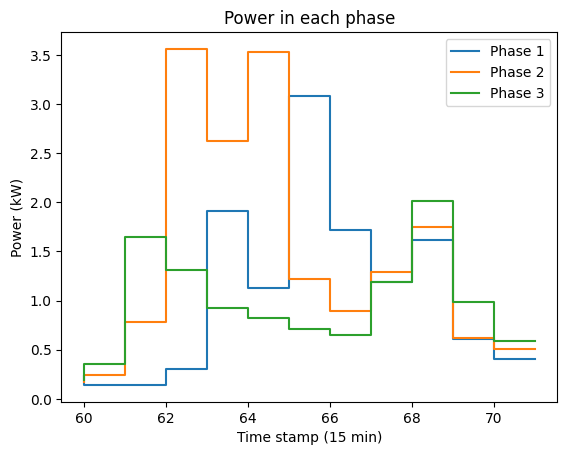

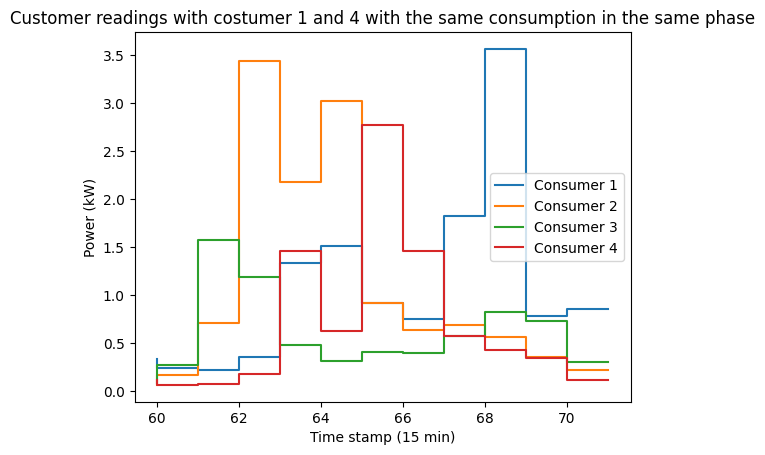

In [35]:

X_tri=np.transpose(4*pw)

#Calculating the y matrix with the consumers with the same consumption 

y_tri=np.zeros((te-ts+1,3))

#Split the values of the 1st consumer throughout the 3 phases
Beta_tri = [[0.3333, 0.3333, 0.33333],
         [0, 1, 0], 
         [0, 0, 1], 
         [1, 0, 0]]

#the y matrix that is tri to X*Beta
y_tri=np.dot(X_tri,Beta_tri)


B = np.dot(X_tri.T,X_tri)
print("The matrix X_tri.T*X_tri is:\n", B)

#Calculate the determinant of the matrix X_tri.T*X_tri
det = np.linalg.det(B)
print("The determinant of the matrix X_tri.T*X_tri is: ", det)

B = np.linalg.inv(B)        
B = np.dot(B,X_tri.T)
B = np.dot(B,y_tri)

print("The estimated Beta for the X_tri matrix is:\n", B)


#Power in each phase (in kw)
plt.step(np.arange(ts,te+1,1),y_tri[:,0],label='Phase 1')
plt.step(np.arange(ts,te+1,1),y_tri[:,1],label='Phase 2')
plt.step(np.arange(ts,te+1,1),y_tri[:,2],label='Phase 3')
plt.ylabel('Power (kW)')
plt.xlabel('Time stamp (15 min)')
plt.legend()
plt.title('Power in each phase')
plt.show()

#plot for X
plt.step(np.arange(ts,te+1,1),X_tri[:,0],label='Consumer 1')
plt.step(np.arange(ts,te+1,1),X_tri[:,1],label='Consumer 2')
plt.step(np.arange(ts,te+1,1),X_tri[:,2],label='Consumer 3')
plt.step(np.arange(ts,te+1,1),X_tri[:,3],label='Consumer 4')
plt.ylabel('Power (kW)')
plt.xlabel('Time stamp (15 min)')
plt.title('Customer readings with costumer 1 and 4 with the same consumption in the same phase')
plt.legend()
plt.show()

#We can conclude that the mechanism is the same and we can estimate the Beta matrix using the same method